In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from indicnlp.tokenize import indic_tokenize
from collections import Counter

train_file = f"hi_train.csv"
test_file = f"hi_test.csv"

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

# Concatenate the train and test dataframe and extract all the hindi text data for word cloud
df = pd.concat([train_df, test_df])

# Remove the rows with missing values and drop the duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Separate the text data based on hate and non-hate labels
pos_text = ' '.join(df[df['LABEL'] == 'Positive']['INDIC REVIEW'])
neg_text = ' '.join(df[df['LABEL'] == 'Negative']['INDIC REVIEW'])

# Tokenize the text using Indic NLP
pos_tokens = indic_tokenize.trivial_tokenize(pos_text)
neg_tokens = indic_tokenize.trivial_tokenize(neg_text)

# Count the frequency of each token
pos_word_freq = Counter(pos_tokens)
neg_word_freq = Counter(neg_tokens)

# Filter out common words that appear in both hate and non-hate text
common_words = set(pos_word_freq.keys()) & set(neg_word_freq.keys())

# Remove common words from the frequency counts
for word in common_words:
    del pos_word_freq[word]
    del neg_word_freq[word]

In [4]:
# Specify the font path or name here
font_path = 'NotoSansDevanagari-VariableFont_wdth,wght.ttf'

In [9]:
# Generate word clouds for hate and non-hate labels
hate_wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None,
                           font_path=font_path, min_font_size=10).generate_from_frequencies(pos_word_freq)

non_hate_wordcloud = WordCloud(width=800, height=800, background_color='black', stopwords=None,
                               font_path=font_path, min_font_size=10).generate_from_frequencies(neg_word_freq)

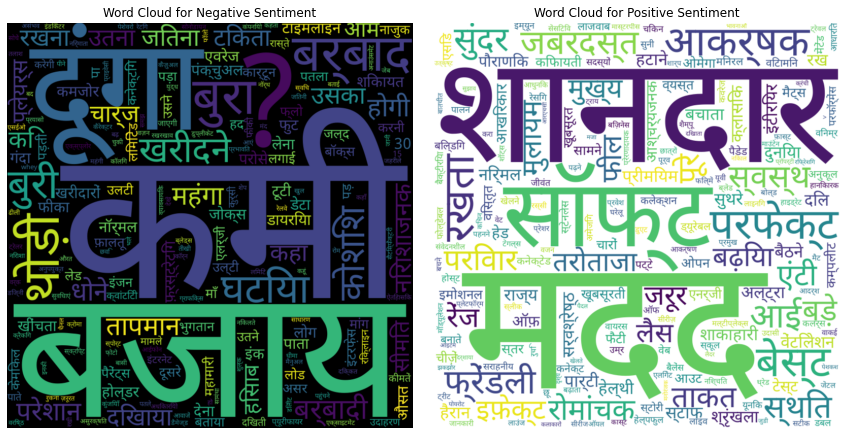

In [10]:
# Plot the word clouds
plt.figure(figsize=(12, 6), facecolor=None)

plt.subplot(1, 2, 1)
plt.imshow(non_hate_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hate_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')

plt.tight_layout()
plt.show()